<a href="https://colab.research.google.com/github/Prav2904/numpy1/blob/master/Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score


In [2]:
# Loading the data from csv file to pandas data frame

features_data = pd.read_csv('features.csv')
stores_data = pd.read_csv('stores.csv')
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
features_data.head()


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
features_data.shape


(8190, 12)

In [5]:
features_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [6]:
stores_data.head()


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
stores_data.shape


(45, 3)

In [8]:
features_data.head()


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [9]:
features_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [10]:
test_data.head()


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [11]:
test_data.shape


(115064, 4)

In [12]:
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [13]:
train_data.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [14]:
train_data.shape


(241338, 5)

In [15]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241338 entries, 0 to 241337
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         241338 non-null  int64  
 1   Dept          241338 non-null  int64  
 2   Date          241338 non-null  object 
 3   Weekly_Sales  241338 non-null  float64
 4   IsHoliday     241338 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 9.2+ MB


Exploratory Data Analysis


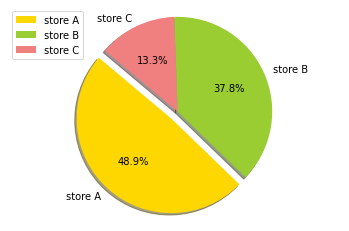

In [16]:
#pie-chart for the visual representation of store types
#https://pythonspot.com/matplotlib-pie-chart/
# Data to plot
labels = 'store A','store B','store C'
sizes = [(22/(45))*100,(17/(45))*100,(6/(45))*100]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.show()


Boxplot for sizes of types of stores


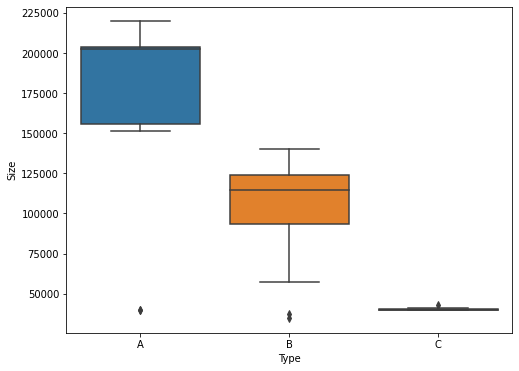

In [17]:
# boxplot for sizes of types of stores
store_type = pd.concat([stores_data['Type'], stores_data['Size']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Size', data=store_type)


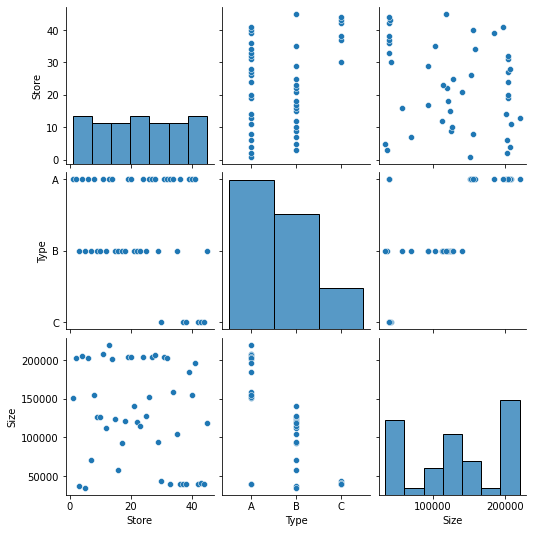

In [18]:
sns.pairplot(stores_data, vars=['Store','Type','Size'])


Check holidays sales frequencies


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


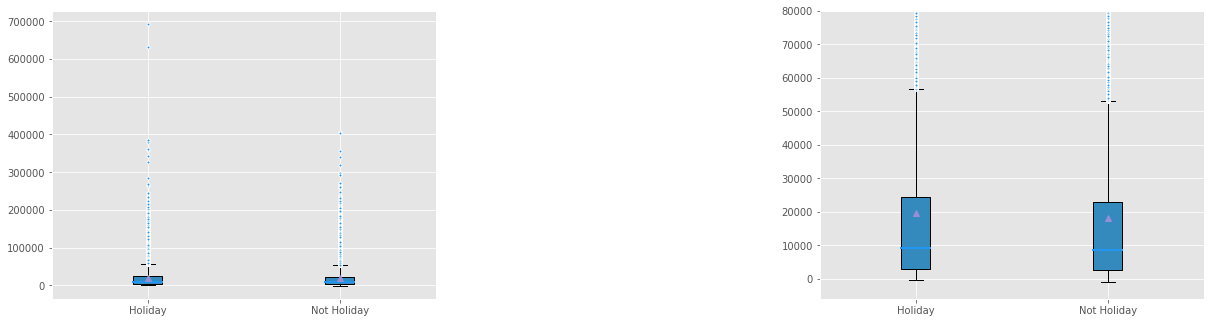

In [19]:
plt.style.use('ggplot')
fig, axes = plt.subplots(1,2, figsize = (20,5))
fig.subplots_adjust(wspace=1, hspace=1)
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

sales_holiday=train_data[['IsHoliday','Weekly_Sales']]
target=[sales_holiday['Weekly_Sales'].loc[sales_holiday['IsHoliday']==True],sales_holiday['Weekly_Sales'].loc[sales_holiday['IsHoliday']==False]]
labels=['Holiday','Not Holiday']

#median
medianprop={'color':'#2196F3',
            'linewidth': 2,
            'linestyle':'-'}
# outliers

flierprop={'color' : '#EC407A',
          'marker' : 'o',
          'markerfacecolor': '#2196F3',
          'markeredgecolor':'white',
          'markersize' : 3,
          'linestyle' : 'None',
          'linewidth' : 0.1}



axes[0].boxplot(target,labels=labels, patch_artist = 'Patch',
                  showmeans=True,
                  flierprops=flierprop,
                  medianprops=medianprop)


axes[1].boxplot(target,labels=labels, patch_artist = 'Patch',
                  showmeans=True,
                  flierprops=flierprop,
                  medianprops=medianprop)

axes[1].set_ylim(-6000,80000)

plt.show()


Understand Department Frequency


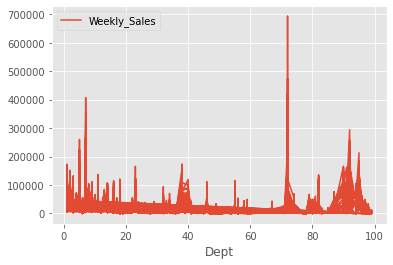

In [20]:
train_data.plot(kind='line', x='Dept', y='Weekly_Sales', alpha=1, fig=(4,5))


Feature Engineering:


In [21]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
test_data['Date'] = pd.to_datetime(test_data['Date'])

#The week ordinal of the year.
train_data['Week'] = train_data['Date'].dt.isocalendar().week
test_data['Week'] = test_data['Date'].dt.isocalendar().week

#The day of the week with Monday=0, Sunday=6.
train_data['Day_of_week'] = train_data['Date'].dt.dayofweek
test_data['Day_of_week'] = test_data['Date'].dt.dayofweek

#The month as January=1, December=12.
train_data['Month'] = train_data['Date'].dt.month 
test_data['Month'] = test_data['Date'].dt.month 

#The year of the datetime.
train_data['Year'] = train_data['Date'].dt.year
test_data['Year'] = test_data['Date'].dt.year

#The days of the datetime.
train_data['Day'] = train_data['Date'].dt.day 
test_data['Day'] = test_data['Date'].dt.day


Merge train, test and the features dataset


In [22]:
features_data['Date'] = pd.to_datetime(features_data['Date'])

#merge the features
train_with_feature = pd.merge_asof(train_data, features_data, on='Store',by='Date')
test_with_feature = pd.merge_asof(test_data, features_data, on='Store',by='Date')


We can take mean of Temp and Unemployment as our features


In [23]:
#let's take mean of Temp and Unemployment
train_with_feature['Temp_mean'] = train_with_feature['Temperature'].mean()
train_with_feature['Unemployment_mean'] = train_with_feature['Unemployment'].mean()
#test data
test_with_feature['Temp_mean'] = test_with_feature['Temperature'].mean()
test_with_feature['Unemployment_mean'] = test_with_feature['Unemployment'].mean()
train_with_feature.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Week,Day_of_week,Month,Year,Day,...,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Temp_mean,Unemployment_mean
0,1,1,2010-02-05,24924.50,False,5,4,2,2010,5,...,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,59.59044,7.523872
1,1,1,2010-02-12,46039.49,True,6,4,2,2010,12,...,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,59.59044,7.523872
2,1,1,2010-02-19,41595.55,False,7,4,2,2010,19,...,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,59.59044,7.523872
3,1,1,2010-02-26,19403.54,False,8,4,2,2010,26,...,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,59.59044,7.523872
4,1,1,2010-03-05,21827.90,False,9,4,3,2010,5,...,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,59.59044,7.523872


Merge all the features in a single data frame:


In [24]:
#merge all the features
train_with_feature_new = pd.merge(train_with_feature,stores_data)
test_with_feature_new = pd.merge(test_with_feature,stores_data)
test_with_feature_new.head()


,Store,Dept,Date,IsHoliday_x,Week,Day_of_week,Month,Year,Day,Temperature,...,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Temp_mean,Unemployment_mean,Type,Size
0,1,1,2012-11-02,False,44,4,11,2012,2,55.32,...,50.82,3639.90,2737.42,223.462779,6.573,False,53.941804,6.868733,A,151315
1,1,1,2012-11-09,False,45,4,11,2012,9,61.24,...,40.28,4646.79,6154.16,223.481307,6.573,False,53.941804,6.868733,A,151315
2,1,1,2012-11-16,False,46,4,11,2012,16,52.92,...,103.78,1133.15,6612.69,223.512911,6.573,False,53.941804,6.868733,A,151315
3,1,1,2012-11-23,True,47,4,11,2012,23,56.23,...,74910.32,209.91,303.32,223.561947,6.573,True,53.941804,6.868733,A,151315
4,1,1,2012-11-30,False,48,4,11,2012,30,52.34,...,3838.35,150.57,6966.34,223.610984,6.573,False,53.941804,6.868733,A,151315


In [25]:
#drop the dublicate of IsHoliday column
train_with_feature = train_with_feature_new.drop(columns=['IsHoliday_x'])
test_with_feature = test_with_feature_new.drop(columns=['IsHoliday_x'])

#let's rename the IsHoliday_y column to IsHoliday
train_with_feature = train_with_feature.rename(columns={"IsHoliday_y": "IsHoliday"})
test_with_feature = test_with_feature.rename(columns={"IsHoliday_y": "IsHoliday"})


In [26]:
train_with_feature.replace({"IsHoliday":{'False':0,'True':1}},inplace=True)


In [27]:
test_with_feature.replace({"IsHoliday":{'False':0,'True':1}},inplace=True)


In [28]:
test_with_feature['Type'].value_counts()


A    58713
B    44500
C    11851
Name: Type, dtype: int64

In [29]:
train_with_feature.replace({"Type":{'A':1,'B':2,'C':3}},inplace=True)


In [30]:
test_with_feature.replace({"Type":{'A':1,'B':2,'C':3}},inplace=True)


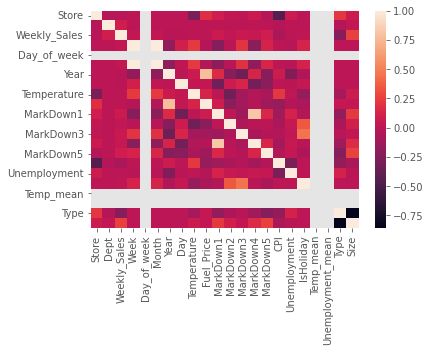

In [31]:
dataplot=sns.heatmap(train_with_feature.corr())
plt.show()


Fixing Missing Values:


In [32]:
train_with_feature=train_with_feature.fillna(0)
test_with_feature=test_with_feature.fillna(0)

In [33]:
# so, let's add mean of Fuel and mean of CPI feature
#train data
train_with_feature['Fuel_Price_mean'] = train_with_feature['Fuel_Price'].mean()
train_with_feature['CPI_mean'] = train_with_feature['CPI'].mean()
#test data
test_with_feature['CPI_mean'] = test_with_feature['CPI'].mean()
test_with_feature['Fuel_Price_mean'] = test_with_feature['Fuel_Price'].mean()


Feature Selection:


In [34]:
features_drop=['CPI','Unemployment','Fuel_Price','Day_of_week','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
train_final=train_with_feature.drop(features_drop, axis=1)
test_final=test_with_feature.drop(features_drop, axis=1)

In [ ]:
#train
train_X=train_final.drop(['Weekly_Sales','Date'], axis=1)
train_Y=train_final['Weekly_Sales'] 

#test
test_X=test_final.drop('Date',axis=1).copy()
train_X.shape, test_y.shape, test_X.shape

In [38]:
train_X.head()


,Store,Dept,Week,Month,Year,Day,Temperature,IsHoliday,Temp_mean,Unemployment_mean,Type,Size,Fuel_Price_mean,CPI_mean
0,1,1,5,2,2010,5,42.31,False,59.59044,7.523872,1,151315,3.35055,174.945534
1,1,1,6,2,2010,12,38.51,True,59.59044,7.523872,1,151315,3.35055,174.945534
2,1,1,7,2,2010,19,39.93,False,59.59044,7.523872,1,151315,3.35055,174.945534
3,1,1,8,2,2010,26,46.63,False,59.59044,7.523872,1,151315,3.35055,174.945534
4,1,1,9,3,2010,5,46.50,False,59.59044,7.523872,1,151315,3.35055,174.945534


In [39]:
train_Y.head()


0    24924.50
1    46039.49
2    41595.55
3    19403.54
4    21827.90
Name: Weekly_Sales, dtype: float64

In [40]:
test_X.head()


,Store,Dept,Week,Month,Year,Day,Temperature,IsHoliday,Temp_mean,Unemployment_mean,Type,Size,CPI_mean,Fuel_Price_mean
0,1,1,44,11,2012,2,55.32,False,53.941804,6.868733,1,151315,118.270541,3.581546
1,1,1,45,11,2012,9,61.24,False,53.941804,6.868733,1,151315,118.270541,3.581546
2,1,1,46,11,2012,16,52.92,False,53.941804,6.868733,1,151315,118.270541,3.581546
3,1,1,47,11,2012,23,56.23,True,53.941804,6.868733,1,151315,118.270541,3.581546
4,1,1,48,11,2012,30,52.34,False,53.941804,6.868733,1,151315,118.270541,3.581546


Machine Learning Models:
Model to Predict the Next Year’s Sales

Final features that we are using to train our model are as follows:

Store — the store number

Dept — the department number

Week: The week ordinal of the year.

Month: The month as January=1, December=12.

Year: The year of the DateTime.

Day: The days of the DateTime.

Temperature: the average temperature in the region

IsHoliday: If Holiday = True == 1, else 0

Size: the size of the store

Types: Types of store, A = 1, B = 2, C = 3

Temp_mean: Mean value Temperature

Unemployment_mean: Mean value of Unemployment

Fuel_Price_mean: Mean value of the cost of fuel in the region

CPI_mean: Mean value of CPI_mean

Dimensions of the final dataset are not too large, bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.



In [42]:
clf = RandomForestRegressor(n_estimators=100)
clf.fit(train_X, train_Y)
y_pred_rf=clf.predict(test_X)
acc_rf= round(clf.score(train_X, train_Y) * 100,3)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


Prediction using our Random Forest model


In [43]:
#https://stackoverflow.com/questions/52411992/how-to-produce-a-kaggle-submission-csv-file-with-specific-entries

submission = pd.DataFrame({
        "Id": test_data.Store.astype(str)+'_'+test_data.Dept.astype(str)+'_'+test_data.Date.astype(str),
        "Weekly_Sales": y_pred_rf
    })

submission.to_csv('submission predicted_RF_Final.csv', index=False)
